#### Download NLTK stopwords

In [3]:
import os

import nltk


nltk_path = os.path.join('a1-data', 'nltk')
nltk.download('stopwords', download_dir=nltk_path)
nltk.data.path.append(nltk_path)

[nltk_data] Downloading package stopwords to a1-data\nltk...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import sys


def print_line(*args):
    """ Inline print and go to the begining of line
    """
    args1 = [str(arg) for arg in args]
    str_ = ' '.join(args1)
    sys.stdout.write(str_ + '\r')
    sys.stdout.flush()

In [5]:
from typing import List, Tuple, Union

import numpy as np

In [6]:
def load_sentence_label(data_path: str) -> Tuple[List[str], List[str]]:
    """ Load sentences and labels from the specified path
    Args:
        data_path: data_path: path to the data file, e.g., 'a1-data/SMSSpamCollection'
        sentences: the raw text list of all sentences
    Returns:
        labels: the label list of all sentences
    """
    sentences, labels = [], []
    f=open(data_path,'r')
    text=f.read() # reading the input dataset
    messages=text.split("\n")  # splitting the text file in a list of labelled sentences
    for i in messages:
        temp=i.split('\t')
        if len(temp)==2:                        # if condition only ensures that there are no unlabelled samples taken
            sentences.append(temp[1].lower())   # X contains sentences , each entry is converted to lower case
            labels.append(temp[0].lower())      # y contains label
    
    return sentences, labels

In [7]:
data_path = os.path.join('a1-data', 'SMSSpamCollection')
sentences, labels = load_sentence_label('./a1-data/SMSSpamCollection')

label_map = {}
for label in sorted(list(set(labels))):
    label_map[label] = len(label_map)
labels = np.array([label_map[label] for label in labels], dtype=int)
sentences = np.array(sentences, dtype=object)

print('Label map:', label_map)
print('Number of sentences and labels:', len(sentences), len(labels))

Label map: {'ham': 0, 'spam': 1}
Number of sentences and labels: 5574 5574


#### Split the data into training, validation and test

In [6]:
def train_test_split(sentences: np.ndarray,
                     labels: np.ndarray,
                     test_ratio: float = 0.2) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """ Split the sentences and labels into training and test data by shuffling
    Args:
        sentences: A numpy array containing all sentences
        labels: A number array containing label ids
        test_ratio: A float number to calculate the number of test data

    Returns:
        train_sentences: A numpy array containing all training sentences
        train_labels: A number array containing all training label ids
        test_sentences: A numpy array containing all test sentences
        test_labels: A number array containing all test label ids
    """
    assert 0 < test_ratio < 1
    assert len(sentences) == len(labels)
    
    index = np.random.permutation(len(sentences))
    test_size = int(len(sentences) * test_ratio)
    test_index = index[:test_size]
    train_index = index[test_size:]

    train_sentences, train_labels = sentences[train_index], labels[train_index]
    test_sentences, test_labels = sentences[test_index], labels[test_index]

    return train_sentences, train_labels, test_sentences, test_labels

In [7]:
np.random.seed(6666)

test_ratio = 0.2
valid_ratio = 0.1
(train_sentences, train_labels,
    test_sentences, test_labels) = train_test_split(sentences, labels, test_ratio)
(train_sentences, train_labels,
    valid_sentences, valid_labels) = train_test_split(train_sentences, train_labels, valid_ratio)

print('Training data length:', len(train_sentences))
print('Validation data length:', len(valid_sentences))
print('Test data length:', len(test_sentences))

Training data length: 4014
Validation data length: 446
Test data length: 1114


In [8]:
def count_label(labels: np.ndarray, label_map: dict[str, int]) -> dict[str, int]:
    """
    Args:
        labels: The labels of a dataset 
        label_map: The mapping from label to label id
    Returns:
        label_count: The mapping from label to its count
    """
    label_count = {key: 0 for key in label_map.keys()}
    
    for i in labels:
        if i==0:
            label_count['ham']+=1
        else:
            label_count['spam']+=1
    
    return label_count

In [9]:
print('Training:', count_label(train_labels, label_map))
print('Validation:', count_label(valid_labels, label_map))
print('Test:', count_label(test_labels, label_map))

Training: {'ham': 3483, 'spam': 531}
Validation: {'ham': 389, 'spam': 57}
Test: {'ham': 955, 'spam': 159}


In [10]:
import re


class Preprocessor:
    def __init__(self, punctuation=True, url=True, number=True):
        self.punctuation = punctuation
        self.url = url
        self.number = number

    def apply(self, sentence: str) -> str:
        """ Apply the preprocessing rules to the sentence
        Args:
            sentence: raw sentence
        Returns:
            sentence: clean sentence
        """
        sentence = sentence.lower()
        if self.url:
            sentence = Preprocessor.remove_url(sentence)
        if self.punctuation:
            sentence = Preprocessor.remove_punctuation(sentence)
        if self.number:
            sentence = Preprocessor.remove_number(sentence)
        sentence = re.sub(r'\s+', ' ', sentence)
        return sentence

    @staticmethod
    def remove_punctuation(sentence: str) -> str:
        """ Remove punctuations in sentence with re
        Args:
            sentence: sentence with possible punctuations
        Returns:
            sentence: sentence without punctuations
        """
        # Start your code here
        sentence = re.sub(r'[^\w\s]', '', sentence)
        # End
        return sentence

    @staticmethod
    def remove_url(sentence: str) -> str:
        """ Remove urls in text with re
        Args:
            sentence: sentence with possible urls
        Returns:
            sentence: sentence without urls
        """
        # Start your code here
        sentence = re.sub(r'http\S+|www\.\S+', '', sentence)
        # End
        return sentence

    @staticmethod
    def remove_number(sentence: str) -> str:
        """ Remove numbers in sentence with re
        Args:
            sentence: sentence with possible numbers
        Returns:
            sentence: sentence without numbers
        """
        # Start your code here
        sentence = re.sub(r'\d+', '', sentence)
        # End
        return sentence

In [11]:
sentence = "Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."

processor = Preprocessor()
clean_sentence = processor.apply(sentence)

print(f'"{sentence}"') 
print('===>')
print(f'"{clean_sentence}"')

"Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."
===>
"interest rates are trimmed to by the south african central bank but the lack of warning hits the rand and surprises markets"


In [12]:
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk.corpus import stopwords


stopwords_set = set(stopwords.words('english'))
stemmer = PorterStemmer()
print(list(stopwords_set)[:10])

["wasn't", 'ours', 'some', 'an', 't', 'can', "mightn't", "didn't", 'of', 'now']


In [13]:
def tokenize(sentence: str) -> List[str]:
    """ Tokenize a sentence into tokens (words)
    Args:
        sentence: clean sentence
    Returns:
        tokens
    """
    words = []
    raw_words=sentence.lower().split(' ')
    
    for i in raw_words:
        if i not in stopwords_set:  # excluding the stop words
            words.append(stemmer.stem(i))   

    return words

In [14]:
sentence = "Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."

processor = Preprocessor()
clean_sentence = processor.apply(sentence)
tokens = tokenize(clean_sentence)

print(f'"{sentence}"') 
print('===>')
print(f'"{tokens}"')

"Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."
===>
"['interest', 'rate', 'trim', 'south', 'african', 'central', 'bank', 'lack', 'warn', 'hit', 'rand', 'surpris', 'market']"




TF-IDF:
$$\text{TF-IDF}(t, d) = \frac{f_{t, d}}{\sum_{t'}{f_{t', d}}} \times \log{\frac{N}{n_t}}$$

- $t$: A term
- $d$: A document. Here, we regard a sentence as a document
- $f_{t, d}$: Number of term $t$ in $d$
- $N$: Number of document
- $n_t$: Number of document containing $t$

In [43]:
from collections import defaultdict


class TfIdfEncoder:
    def __init__(self):
        self.vocab = defaultdict(int)
        self.token2index = {}
        self.df = defaultdict(int)
        self.num_doc = 0
        self.processor = Preprocessor()

    def fit(self, sentences: Union[List[str], np.ndarray]) -> int:
        """ Using the given texts to store key information in TF-IDF calculation
            In this function, you are required to implement the fitting process.
                1. Construct the vocabulary and store the frequency of tokens (self.vocab).
                2. Construct the document frequency map to tokens (self.df).
                3. Construct the token to index map based on the frequency.
                   The token with a higher frequency has the smaller index
        Args:
            sentences: Raw sentences
        Returns:
            token_num
        """
        self.num_doc = len(sentences)
        for i, sentence in enumerate(sentences):
            if i % 100 == 0 or i == len(sentences) - 1:
                print_line('Fitting TF-IDF encoder:', (i + 1), '/', len(sentences))
            
            tokens = sentence.split()
            for token in tokens:
                if token in self.vocab:
                    self.vocab[token] += 1
                else:
                    self.vocab[token] = 1
            
        print_line('\n')
    
        for token in self.vocab:
            self.df[token] = sum([1 for sentence in sentences if token in sentence])
        
        self.token2index = {token: i for i, (token, _) in enumerate(sorted(self.vocab.items(), key=lambda x: -x[1]))}
        
        token_num = len(self.token2index) 
        print('The number of distinct tokens:', token_num)
        return token_num

    def encode(self, sentences: Union[List[str], np.ndarray]) -> np.ndarray:
        """ Encode the sentences into TF-IDF feature vector
            Note: if a token in a sentence does not exist in the fit encoder, we just ignore it.
        Args:
            sentences: Raw sentences
        Returns:
            features: A (n x token_num) matrix, where n is the number of sentences
        """
        n = len(sentences)
        features = np.zeros((n, len(self.token2index)))
        for i, sentence in enumerate(sentences):
            if i % 100 == 0 or i == n - 1:
                print_line('Encoding with TF-IDF encoder:', (i + 1), '/', n)
            
            tf = {}
            tokens = sentence.split()
            for token in tokens:
                if token in tf:
                    tf[token] += 1
                else:
                    tf[token] = 1
            for token, tf_value in tf.items():
                if token in self.token2index:
                    tf_idf = (tf_value / len(tokens)) * np.log(self.num_doc / self.df[token])
                    features[i, self.token2index[token]] = tf_idf
            
        print_line('\n')
        return features

##### Test your implementation by running the following cell.

In [44]:
encoder = TfIdfEncoder()
encoder.fit(train_sentences[:100])
features = encoder.encode(train_sentences[:10])

print(features[:5])

Fitting TF-IDF encoder: 100 / 100
The number of distinct tokens: 764
Encoding with TF-IDF encoder: 10 / 10
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.17980161 ... 0.         0.         0.        ]
 [0.0061233  0.03992538 0.         ... 0.         0.         0.        ]
 [0.         0.06142367 0.         ... 0.         0.         0.        ]
 [0.00340183 0.06654231 0.         ... 0.         0.         0.        ]]


#### Encode training, validation, and test dataset

In [45]:
num_class = 2

encoder = TfIdfEncoder()
vocab_size = encoder.fit(train_sentences)

x_train = encoder.encode(train_sentences)
x_valid = encoder.encode(valid_sentences)
x_test = encoder.encode(test_sentences)

y_train = train_labels.reshape(-1, 1)
y_valid = valid_labels.reshape(-1, 1)
y_test = test_labels.reshape(-1, 1)

print('The size of training set:', x_train.shape, y_train.shape)
print('The size of validation set:', x_valid.shape, y_valid.shape)
print('The size of test set:', x_test.shape, y_test.shape)

Fitting TF-IDF encoder: 4014 / 4014
The number of distinct tokens: 11210
Encoding with TF-IDF encoder: 4014 / 4014
Encoding with TF-IDF encoder: 446 / 446
Encoding with TF-IDF encoder: 1114 / 1114
The size of training set: (4014, 11210) (4014, 1)
The size of validation set: (446, 11210) (446, 1)
The size of test set: (1114, 11210) (1114, 1)


In [27]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """ The sigmoid activation function
    Args:
        x: Input matrix or vector
    Returns:
        output: Sigmoid value of each entry in x
    """
    # Start your code here    
    x = 1 / (1 + np.exp(-x))
    # End
    return x

In [28]:
class LogisticRegression:
    def __init__(self, feature_dim: int, lambda_: float):
        """ Logistic Regression Model
        Args:
            feature_dim: feature dimension
            lambda_: lambda in L2 regularizer
        """
        self.w = np.random.normal(size=(feature_dim, 1))
        self.b = 0
    
        self.lambda_ = lambda_
        self.eps = 1e-9

    def forward(self, x: np.ndarray) -> np.ndarray:
        """ Forward process of logistic regression
            Calculate y_hat using x
        Args:
            x: Input data
        Returns:
            y_hat: Output
        """
        y_hat = 0
        z = np.dot(x, self.w) + self.b
        y_hat = sigmoid(z)        
        return y_hat

    def backward(self,
                 x: np.ndarray,
                 y_hat: np.ndarray,
                 y: np.ndarray) -> Tuple[np.ndarray, Union[float, np.ndarray]]:
        """ Backward process of logistic regression
            Calculate the gradient of w and b
        Args:
            x: Input data
            y_hat: Output of forward
            y: Ground-truth
        Returns:
            w_grad: Gradient of w
            b_grad: Gradient of b
        """
        w_grad, b_grad = 0.0, 0.0
        n = len(x)
        w_grad = (1 / len(x)) * np.dot(x.T, (y_hat - y)) + 2 * self.lambda_ * self.w
        b_grad = np.mean(y_hat - y)
    
        return w_grad, b_grad

    def binary_cross_entropy_loss(self,
                                  y_hat: np.ndarray,
                                  y: np.ndarray) -> Union[float, np.ndarray]:
        """ Calculate the binary cross-entropy loss
        Args:
            y_hat: Output of forward
            y: Ground-truth
        Returns:
            loss: BCE loss
        """
        y_hat = np.clip(y_hat, a_min=self.eps, a_max=1 - self.eps)
        loss = 0
        loss = np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

        return loss

    def gradient_descent(self, w_grad: np.ndarray, b_grad: Union[np.ndarray, float], lr: float):
        self.w -= lr * w_grad
        self.b -= lr * b_grad

    def predict(self, y_hat: np.ndarray) -> np.ndarray:
        """ Predict the label using the output y_hat
        Args:
            y_hat: Model output
        Returns:
            pred: Prediction
        """
        pred = np.round(y_hat)
        return pred

In [29]:
def get_metrics(y_pred: np.ndarray, y_true: np.ndarray) -> Tuple[float, float, float, float]:
    """ Calculate the accuracy, precision, recall, and f1 score.
        You are only allowed to use numpy here.
    Args:
        y_pred: Prediction
        y_true: Ground-truth
    Returns:
        accuracy, precision, recall, f1
    """
    assert y_pred.shape == y_true.shape
    accuracy, precision, recall, f1 = 0.0, 0.0, 0.0, 0.0
    
    tp = np.sum(np.logical_and(y_pred == 1, y_true == 1))
    fp = np.sum(np.logical_and(y_pred == 1, y_true == 0))
    fn = np.sum(np.logical_and(y_pred == 0, y_true == 1))
    tn = np.sum(np.logical_and(y_pred == 0, y_true == 0))
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)    
    
    return accuracy, precision, recall, f1

### Stochastic Gradient Descent (SGD)

In [30]:
from collections import OrderedDict


def train_sgd(model: 'LogisticRegression',
              x_train: np.ndarray,
              y_train: np.ndarray,
              x_valid: np.ndarray,
              y_valid: np.ndarray,
              lr: float,
              num_epoch: int,
              print_every: int = 10) -> Tuple[dict[str, List], dict[str, List]]:
    """ Training with Stochastic Gradient Descent
    Args:
        model: The logistic regression model
        x_train: Training feature, (n x d) matrix
        y_train: Training label, (n, ) vector
        x_valid: Validation feature, (n x d) matrix
        y_valid: Validation label, (n, ) vector
        lr: Learning rate
        num_epoch: Number of training epochs
        print_every: Print log every {print_every} epochs
    Returns:
        train_history: Log of training information. The format of training history is
                       { 'loss': [] }
                       It records the average loss of each epoch.
        valid_history: Log of validation information. The format of validation history is
                       {
                           'loss': [],
                           'accuracy': [],
                           'precision': [],
                           'recall': [],
                           'f1': []
                       }
    """
    train_history = OrderedDict({'loss': []})
    valid_history = OrderedDict({
        'loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    })

    def format_output(epoch, num_epoch, train_history, valid_history):
        epoch_log = f'Epoch {epoch + 1} / {num_epoch}'
        train_log = ' - '.join([f'train_{key}: {val[-1]:.4f}' for key, val in train_history.items()])
        valid_log = ' - '.join([f'valid_{key}: {val[-1]:.4f}' for key, val in valid_history.items()])
        log = f'{epoch_log}: {train_log} - {valid_log}'
        return log

    train_num_samples = len(x_train)
    for epoch in range(num_epoch):
        epoch_loss = 0.0
        
        for i in range(train_num_samples):
            
            # Pick a random sample from the training set
            
            random_sample = np.random.choice(x_train.shape[0], 1, replace = False)
            x, y = x_train[random_sample,:], y_train[random_sample,:]
        
            y_hat = model.forward(x)
            
            loss = model.binary_cross_entropy_loss(y_hat, y)
            epoch_loss += loss
            
            w_grad, b_grad = model.backward(x, y_hat, y)
            
            model.gradient_descent(w_grad, b_grad, lr)
        
        valid_loss = 0.
        accuracy, precision, recall, f1 = 0.0, 0.0, 0.0, 0.0
    
        y_hat = model.forward(x_valid)
        pred_result = model.predict(y_hat)
        
        valid_loss = model.binary_cross_entropy_loss(pred_result, y_valid)
        
        accuracy, precision, recall, f1 = get_metrics(pred_result, y_valid)
    
        train_history['loss'].append(epoch_loss / train_num_samples)
        for vals, val in zip(valid_history.values(), [valid_loss, accuracy, precision, recall, f1]):
            vals.append(val)
        log = format_output(epoch, num_epoch, train_history, valid_history)
        if epoch % print_every == 0 or epoch == num_epoch - 1:
            print(log)
        else:
            print_line(log)

    return train_history, valid_history

Run SGD

In [32]:
np.random.seed(6666)

num_epoch = 100
lr = 1e-1
lambda_ = 1e-7
print_every = 10

model_sgd = LogisticRegression(feature_dim=vocab_size, lambda_=lambda_)
sgd_train_history, sgd_valid_history = train_sgd(model_sgd, x_train, y_train, x_valid, y_valid, lr, num_epoch, print_every)

Epoch 1 / 100: train_loss: 0.5063 - valid_loss: 3.2525 - valid_accuracy: 0.8430 - valid_precision: 0.2174 - valid_recall: 0.0877 - valid_f1: 0.1250
Epoch 11 / 100: train_loss: 0.1041 - valid_loss: 1.3010 - valid_accuracy: 0.9372 - valid_precision: 0.8372 - valid_recall: 0.6316 - valid_f1: 0.7200
Epoch 21 / 100: train_loss: 0.0555 - valid_loss: 1.0687 - valid_accuracy: 0.9484 - valid_precision: 0.8696 - valid_recall: 0.7018 - valid_f1: 0.7767
Epoch 31 / 100: train_loss: 0.0380 - valid_loss: 0.9758 - valid_accuracy: 0.9529 - valid_precision: 0.8750 - valid_recall: 0.7368 - valid_f1: 0.8000
Epoch 41 / 100: train_loss: 0.0297 - valid_loss: 0.9293 - valid_accuracy: 0.9552 - valid_precision: 0.8936 - valid_recall: 0.7368 - valid_f1: 0.8077
Epoch 51 / 100: train_loss: 0.0235 - valid_loss: 0.8828 - valid_accuracy: 0.9574 - valid_precision: 0.8958 - valid_recall: 0.7544 - valid_f1: 0.8190
Epoch 61 / 100: train_loss: 0.0194 - valid_loss: 0.8364 - valid_accuracy: 0.9596 - valid_precision: 0.8980 

In [33]:
def train_mbgd(model: 'LogisticRegression',
               x_train: np.ndarray,
               y_train: np.ndarray,
               x_valid: np.ndarray,
               y_valid: np.ndarray,
               lr: float,
               num_epoch: int,
               batch_size: int,
               print_every: int = 10) -> Tuple[dict[str, List], dict[str, List]]:
    """ Training with Stochastic Gradient Descent
    Args:
        model: The logistic regression model
        x_train: Training feature, (n x d) matrix
        y_train: Training label, (n, ) vector
        x_valid: Validation feature, (n x d) matrix
        y_valid: Validation label, (n, ) vector
        lr: Learning rate
        num_epoch: Number of training epochs
        batch_size: Number of training samples in a batch
        print_every: Print log every {print_every} epochs
    Returns:
        train_history: Log of training information. The format of training history is
                       { 'loss': [] }
                       It records the average loss of each epoch.
        valid_history: Log of validation information. The format of training and validation history is
                       {
                           'loss': [],
                           'accuracy': [],
                           'precision': [],
                           'recall': [],
                           'f1': []
                       }
    """
    train_history = OrderedDict({'loss': []})
    valid_history = OrderedDict({
        'loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    })

    def format_output(epoch, num_epoch, train_history, valid_history):
        epoch_log = f'Epoch {epoch + 1} / {num_epoch}'
        train_log = ' - '.join([f'train_{key}: {val[-1]:.4f}' for key, val in train_history.items()])
        valid_log = ' - '.join([f'valid_{key}: {val[-1]:.4f}' for key, val in valid_history.items()])
        log = f'{epoch_log}: {train_log} - {valid_log}'
        return log

    train_num_samples = len(x_train)
    n_batch = train_num_samples // batch_size
    for epoch in range(num_epoch):
        epoch_loss = 0.0  
        
        for i in range(n_batch):
            batch_x = x_train[i*batch_size : (i+1)*batch_size]
            batch_y = y_train[i*batch_size : (i+1)*batch_size]
            model_output = model.forward(batch_x)
            loss = model.binary_cross_entropy_loss(model_output, batch_y)
            epoch_loss += loss
            w_grad, b_grad = model.backward(batch_x, model_output, batch_y)
            model.gradient_descent(w_grad, b_grad, lr)
                    
        valid_loss = 0.
        accuracy, precision, recall, f1 = 0.0, 0.0, 0.0, 0.0
     
        y_hat = model.forward(x_valid)
        pred_result = model.predict(y_hat)
        
        valid_loss = model.binary_cross_entropy_loss(pred_result, y_valid)
        
        accuracy, precision, recall, f1 = get_metrics(pred_result, y_valid)
    
        valid_history['loss'].append(valid_loss)
        valid_history['accuracy'].append(accuracy)
        valid_history['precision'].append(precision)
        valid_history['recall'].append(recall)
        valid_history['f1'].append(f1)
        
        train_history['loss'].append(epoch_loss / train_num_samples)
        for vals, val in zip(valid_history.values(), [valid_loss, accuracy, precision, recall, f1]):
            vals.append(val)
        log = format_output(epoch, num_epoch, train_history, valid_history)
        if epoch % print_every == 0 or epoch == num_epoch - 1:
            print(log)
        else:
            print_line(log)

    return train_history, valid_history

Run Mini-batch Gradient Descent

In [34]:
np.random.seed(6666)

num_epoch = 100
lr = 1e-1
batch_size = 4
lambda_ = 1e-7
print_every = 10

model_mbgd = LogisticRegression(feature_dim=vocab_size, lambda_=lambda_)
mbgd_train_history, mbgd_valid_history = train_mbgd(model_mbgd, x_train, y_train, x_valid, y_valid, lr, num_epoch, batch_size, print_every)

Epoch 1 / 100: train_loss: 0.1415 - valid_loss: 2.9737 - valid_accuracy: 0.8565 - valid_precision: 0.1111 - valid_recall: 0.0175 - valid_f1: 0.0303
Epoch 11 / 100: train_loss: 0.0702 - valid_loss: 2.5091 - valid_accuracy: 0.8789 - valid_precision: 0.6000 - valid_recall: 0.1579 - valid_f1: 0.2500
Epoch 21 / 100: train_loss: 0.0439 - valid_loss: 1.7192 - valid_accuracy: 0.9170 - valid_precision: 0.8333 - valid_recall: 0.4386 - valid_f1: 0.5747
Epoch 31 / 100: train_loss: 0.0320 - valid_loss: 1.3010 - valid_accuracy: 0.9372 - valid_precision: 0.8919 - valid_recall: 0.5789 - valid_f1: 0.7021
Epoch 41 / 100: train_loss: 0.0254 - valid_loss: 1.2081 - valid_accuracy: 0.9417 - valid_precision: 0.8780 - valid_recall: 0.6316 - valid_f1: 0.7347
Epoch 51 / 100: train_loss: 0.0211 - valid_loss: 1.1616 - valid_accuracy: 0.9439 - valid_precision: 0.8810 - valid_recall: 0.6491 - valid_f1: 0.7475
Epoch 61 / 100: train_loss: 0.0181 - valid_loss: 1.1616 - valid_accuracy: 0.9439 - valid_precision: 0.8636 

In [35]:

y_hat = model_sgd.forward(x_test)
pred_final = model_sgd.predict(y_hat)
accuracy, precision, recall, f1 = get_metrics(pred_final, y_test)

print('Metrics for the SGD model: ')
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1: %.2f' % f1)


# Mini-batch GD

y_hat = model_mbgd.forward(x_test)
pred_final = model_mbgd.predict(y_hat)
accuracy, precision, recall, f1 = get_metrics(pred_final, y_test)
print('')

print('Metrics for the Mini-batch GD model: ')
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1: %.2f' % f1)


Metrics for the SGD model: 
Accuracy: 0.97
Precision: 0.93
Recall: 0.86
F1: 0.89

Metrics for the Mini-batch GD model: 
Accuracy: 0.96
Precision: 0.93
Recall: 0.79
F1: 0.85


#### Evaluation Metrics on Test set


|     Optimizer     | Accuracy    | Precision   | Recall      | F1 Score    |
|:-----------------:|-------------|-------------|-------------|-------------|
|      **SGD**      | 0.97        |    0.93     |  0.86       | 0.89        |
| **Mini-batch GD** | 0.96        |    0.93     |  0.79       | 0.85        |

##### Plotting the training loss curve for SGD and Mini-batch GD

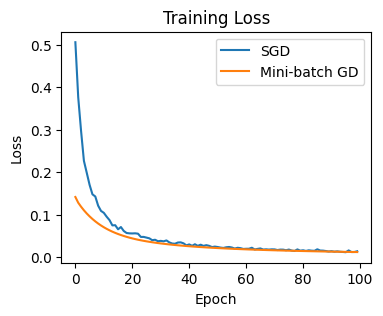

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(4, 3))
plt.plot(sgd_train_history['loss'], label='SGD')
plt.plot(mbgd_train_history['loss'], label='Mini-batch GD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

##### Please run the following cell to plot the validation metrics curve for SGD and Mini-batch GD

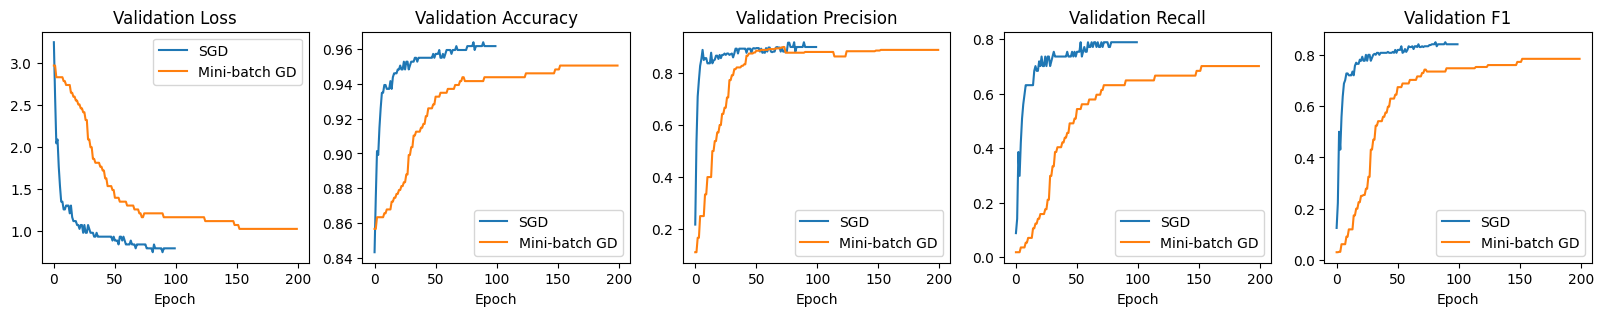

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for i, key in enumerate(sgd_valid_history.keys()):
    sgd_vals, mbgd_vals = sgd_valid_history[key], mbgd_valid_history[key]
    ax = axes[i]
    ax.plot(sgd_vals, label='SGD')
    ax.plot(mbgd_vals, label='Mini-batch GD')
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_title('Validation ' + key.capitalize())
plt.show()

In [49]:
lambdas = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0.0]

In [50]:
best_lambda = 0.0
best_f1 = 0.0

num_epoch = 100
lr = 1e-1
batch_size = 4
print_every = 100
np.random.seed(6666)

for i in lambdas:
    
    print('lambda_value : ', i)
    
    model = LogisticRegression(feature_dim=vocab_size, lambda_= i)
    train_history, valid_history = train_mbgd(model, x_train, y_train, x_valid, y_valid, 
                                                lr, num_epoch, batch_size, print_every)
    f1 = valid_history['f1'][-1]
    if f1 > best_f1:
        best_f1 = f1
        best_lambda = i
print(best_lambda)

lambda_value :  1
Epoch 1 / 100: train_loss: 0.1002 - valid_loss: 2.6485 - valid_accuracy: 0.8722 - valid_precision: 0.0000 - valid_recall: 0.0000 - valid_f1: 0.0000
Epoch 100 / 100: train_loss: 0.0978 - valid_loss: 2.6485 - valid_accuracy: 0.8722 - valid_precision: 0.0000 - valid_recall: 0.0000 - valid_f1: 0.0000
lambda_value :  0.1
Epoch 1 / 100: train_loss: 0.1011 - valid_loss: 2.6485 - valid_accuracy: 0.8722 - valid_precision: 0.0000 - valid_recall: 0.0000 - valid_f1: 0.0000
Epoch 100 / 100: train_loss: 0.0976 - valid_loss: 2.6485 - valid_accuracy: 0.8722 - valid_precision: 0.0000 - valid_recall: 0.0000 - valid_f1: 0.0000
lambda_value :  0.01
Epoch 1 / 100: train_loss: 0.1076 - valid_loss: 2.6485 - valid_accuracy: 0.8722 - valid_precision: 0.0000 - valid_recall: 0.0000 - valid_f1: 0.0000
Epoch 100 / 100: train_loss: 0.0946 - valid_loss: 2.6485 - valid_accuracy: 0.8722 - valid_precision: 0.0000 - valid_recall: 0.0000 - valid_f1: 0.0000
lambda_value :  0.001
Epoch 1 / 100: train_loss